In [16]:
import graspologic

import numpy as np
%matplotlib inline


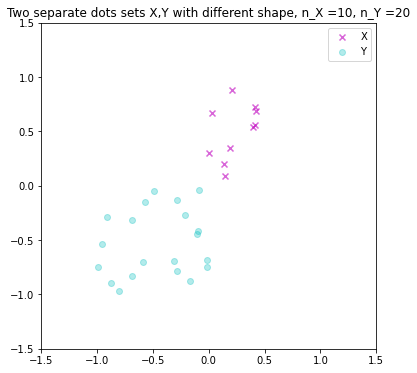

In [23]:
import matplotlib.pyplot as plt

# Now we import an random array of (10,2) as the coordinates of 10 points in X
# For rotation, introduce another random array of (20,2) as the coordinates of 20 points in Z
# Rotate Z in n degree to get Y
np.random.seed(1)
X = np.random.rand(10,2)
Y = Z = np.random.rand(20,2)

i = 0
n = 3.14
while i <= 19:
    a_Z= Z[i,0]
    b_Z = Z[i,1]
    c = (a_Z**2 + b_Z**2)**0.5
    n_Z = np.arctan(b_Z/a_Z)
    a_Y = c* np.cos(n + n_Z) 
    b_Y = c* np.sin(n + n_Z)
    Y[i] = ([a_Y, b_Y])
    i = i+1

np.random.seed(1)
X = np.random.rand(10,2)

# Here we got two different dot sets X, Y, being away from each other
# Plot X, Y
plt.subplots(1, 1, figsize=(6, 6))
plt.title("Two separate dots sets X,Y with different shape, n_X =10, n_Y =20")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

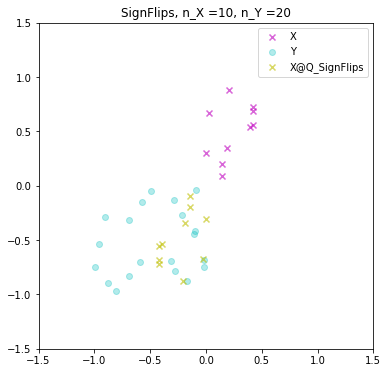

In [24]:
# Use SignFlips to get a Q that could align X with Y.
# X@Q_SignFlips is the output of rotated X by SignFlips.
from graspologic.align import SignFlips
X_prime_SignFlips = SignFlips().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SignFlips, n_X =10, n_Y =20")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", alpha=0.6, color='y', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

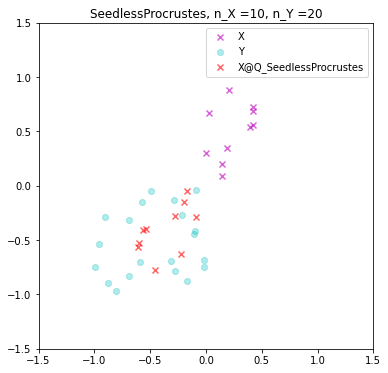

In [25]:
# Use SeedlessProcrustes to get a Q that could align X with Y.
# X@Q_SeedlessProcrustes is the output of rotated X by SeedlessProcrustes.

from graspologic.align import SeedlessProcrustes

X_prime_Seedless = SeedlessProcrustes().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("SeedlessProcrustes, n_X =10, n_Y =20")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", alpha=0.6, color='r', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [26]:
# Since the number of dots in X and Y are different, we cannot use OrthogonalProcrustes,
# When you try that, it would report a ValueError.

from graspologic.align import OrthogonalProcrustes

X_prime_Orthogonal = OrthogonalProcrustes().fit_transform(X, Y)
plt.subplots(1, 1, figsize=(6, 6))
plt.title("OrthogonalProcrustes, n_X =10, n_Y =20")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.scatter(X_prime_Orthogonal[:,0], X_prime_Orthogonal[:,1], label="X@Q_OrthogonalProcrustes", alpha=0.6, color='b', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

ValueError: Two datasets have different number of entries! OrthogonalProcrustes assumes that entries of the two datasets are matched. consider using SeedlessProcrustes instead.

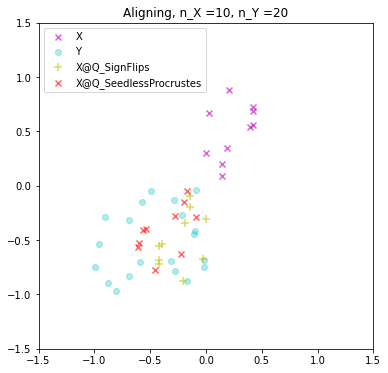

In [27]:
# Plot all the ratation by Aligning for comparison.
plt.subplots(1, 1, figsize=(6, 6))
plt.title("Aligning, n_X =10, n_Y =20")
plt.scatter(X[:,0], X[:,1], label="X", alpha=0.6, color='m', marker='x')
plt.scatter(Y[:,0], Y[:,1], label="Y", alpha=0.3, color='c')
plt.scatter(X_prime_SignFlips[:,0], X_prime_SignFlips[:,1], label="X@Q_SignFlips", alpha=0.6, color='y', marker='+', s=50)
plt.scatter(X_prime_Seedless[:,0], X_prime_Seedless[:,1], label="X@Q_SeedlessProcrustes", alpha=0.6, color='r', marker='x')
plt.xlim(-1.50, 1.50)
plt.ylim(-1.50, 1.50)
plt.legend();

In [28]:
# We can see that when X,Y are two dot sets with different shape, SeedlessProcrustes 
# works better than SignFlips, for aligning X with Y. And OrthogonalProcrustes is 
# not applicable in this case.